## Experiment with the Digits Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# we import somd data from the sklearn dataset module
from sklearn import datasets

# Split the data into training and test set
from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import the class for KNN clssification
from sklearn.neighbors import KNeighborsClassifier

# Create a standard workflow for ML
from sklearn.pipeline import make_pipeline

# Feature sandardization
from sklearn.preprocessing import StandardScaler


In [2]:
n_neighbors = 3

# Reproducibility of the results
random_state = 0


## Load the image data

In [3]:
X, y = datasets.load_digits(return_X_y=True)


In [4]:
X.shape

(1797, 64)

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

## Split data into training and test set

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=random_state)

In [13]:
X_train.shape

(898, 64)

In [14]:
X_test.shape

(899, 64)

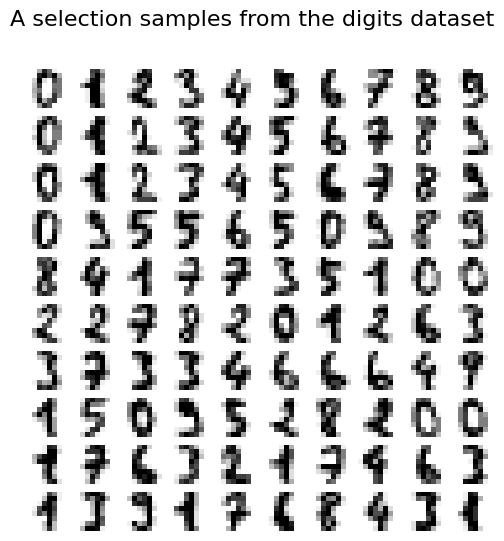

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection samples from the digits dataset", fontsize=16)

In [17]:
dim = len(X[0])
dim

64

In [18]:
n_classes = len(np.unique(y))
n_classes

10

## Reduce Dimension

In [19]:
# Pipeline for PCA
pca = make_pipeline( StandardScaler(), PCA(n_components=2, random_state=random_state))


# Pipeline LDA
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))


## Build a KNN Classifier model

In [20]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

dim_reduction_methods = [("PCA", pca), ("LDA", lda)]

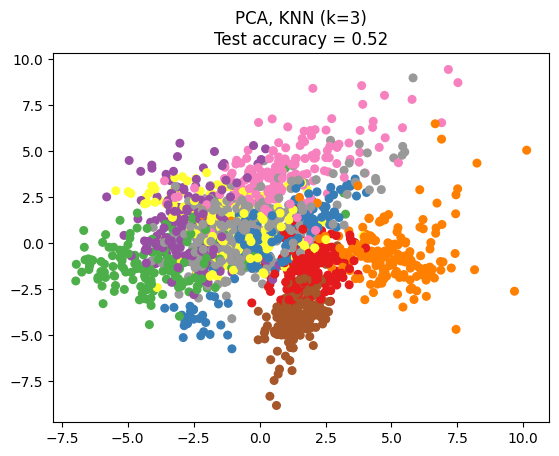

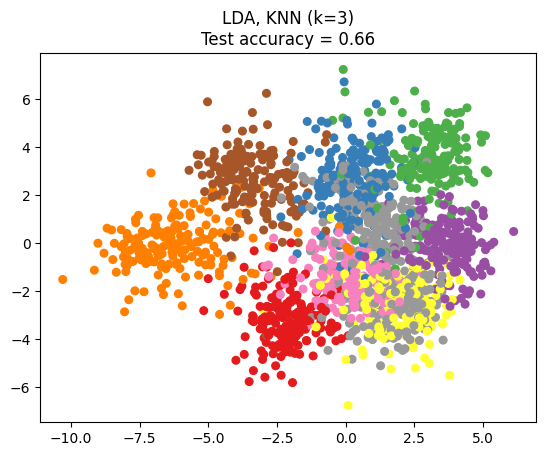

In [21]:

for i, (name, model) in enumerate(dim_reduction_methods):
  plt.figure()
  
  # Train the model with the training data
  model.fit(X_train, y_train)
   
  # reducting the dimension of the training data into lower dimensional space
  # training the knn on the lower-dimensional data
  knn.fit(model.transform(X_train), y_train)

  # Prediciton on the test data
  acc_knn = knn.score(model.transform(X_test), y_test)

  # Lower dimensional data in 2D (n_components) space
  X_embedded = model.transform(X)

  # Plot the data
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
  plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )

plt.show()


In [26]:
X_test.shape

(899, 64)

In [25]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=2))])

In [29]:
X_test[0].reshape(1,64)

array([[ 0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         2.,  0.,  0.,  0.,  0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 15.,  5.,  0.,  0.,
         0.,  0.,  3., 15., 16., 11., 14.,  7.,  0.,  0.,  0., 11., 16.,
         6.,  6., 15.,  0.,  0.,  0.,  0., 10., 14., 12.,  8.,  0.]])

In [33]:
  pred = knn.predict(model.transform(X_test[0].reshape(1,64)))
  pred

array([6])

In [36]:
type(pred)

numpy.ndarray

In [35]:
type(y_test[0])

numpy.int64

In [32]:
y_test[0]

6